#Bootcamp test
Happiness is a very important aspect of our society. As individuals, we try to pursue happiness all our lives. But in a broader view, a happy society also seems to correlate with a higher engagement with the Sustainable Development Goals. As you can read in the World Happiness Report 2020: “As countries become richer the well-being of their citizens stagnates unless further economic growth is more sustainable by, for example, addressing inequality and improving environmental quality.”

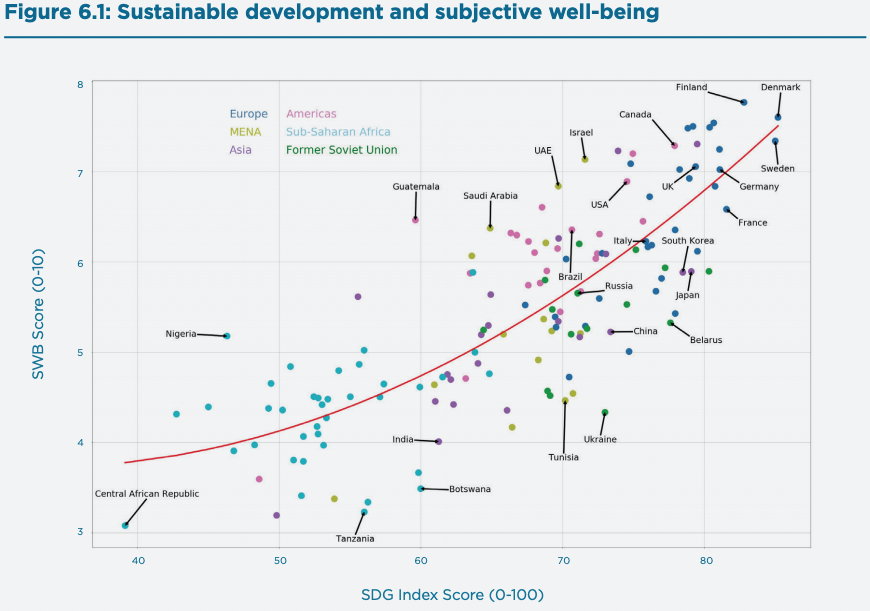

For this test, you will be using data from the World Happiness Report 2015 and 2019 from Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

Let’s dive into the data! 

####1. Load the 2 datasets 


In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df_19=pd.read_csv('2019.csv')
df_15=pd.read_csv('2015.csv')

'/content'

In [54]:
df_15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [55]:
df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


####2. Remove 'Dystopia residual' from 2015 dataset 

In [56]:
df_15.drop('Dystopia Residual', inplace=True, axis=1)

####3. Add column ‘Year’ to both 2015 and 2019 dataset 

In [57]:
df_15['Year']='2015'
df_19['Year']='2019'

In [58]:
df_15['Year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Year, dtype: object

####4. Create a new column Region and assign the regions from the 2015 dataset to the right countries in the 2019 dataset 

In [59]:
df_19['Region'] = ''
for index, row in df_19.iterrows():
    country = df_19.loc[index]["Country or region"]
    if country in df_15['Country'].values:
        df_19.at[index,"Region"] = df_15[df_15["Country"] == country]["Region"].values[0]
    else:
        # in data from 2019 is South Sudan and in data from 2015 is Sudan, but those countries are the same region
        for c15 in df_15["Country"].values:
            if (c15.lower() in country.lower()) or (country.lower() in c15.lower()):
                df_19.at[index,"Region"] = df_15[df_15["Country"] == c15]["Region"].values[0]


In [60]:
df_19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019,Western Europe


####5. Merge the 2 datasets to form a new one with the same number of columns as 2015 

In [61]:
columns15 = list(df_15.columns)
columns19 = list(df_19.columns)

for c15 in columns15:
    if c15 not in columns19:
        for c19 in columns19:
            if (c19.lower() in c15.lower()) or (c15.lower() in c19.lower()):
                df_19.rename(columns = {c19:c15}, inplace = True)

df = pd.concat([df_15,df_19], sort=True)
columnstodrop=[]
columns19 = list(df_19.columns)
for i in columns19:
    if i not in columns15:
        columnstodrop.append(i)
df.drop(columnstodrop, inplace=True, axis=1)

In [62]:
df.head()

,Country,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Region,Standard Error,Trust (Government Corruption),Year
0,Switzerland,1.39651,1.34951,0.66557,0.29678,1.0,7.587,0.94143,Western Europe,0.03411,0.41978,2015
1,Iceland,1.30232,1.40223,0.62877,0.43630,2.0,7.561,0.94784,Western Europe,0.04884,0.14145,2015
2,Denmark,1.32548,1.36058,0.64938,0.34139,3.0,7.527,0.87464,Western Europe,0.03328,0.48357,2015
3,Norway,1.45900,1.33095,0.66973,0.34699,4.0,7.522,0.88521,Western Europe,0.03880,0.36503,2015
4,Canada,1.32629,1.32261,0.63297,0.45811,5.0,7.427,0.90563,North America,0.03553,0.32957,2015


####6. List the countries that participated in 2015 but not 2019 

In [63]:
country_list = []
for country15 in df_15['Country'].values:
    if country15 not in df_19['Country'].values:
        country_list.append(country15)
print('\nCountries that participated in 2015 but not 2019:', end='\n')
k=0
for i in country_list:
    if k!=len(country_list)-1:
        print('* ',i,end=',\n')
    else:
        print('* ',i,end=".\n")
    k+=1



Countries that participated in 2015 but not 2019:
*  Oman,
*  Suriname,
*  Trinidad and Tobago,
*  North Cyprus,
*  Somaliland region,
*  Macedonia,
*  Sudan,
*  Djibouti,
*  Angola.


####7. Plot a bar chart for the countries' generosity for each year

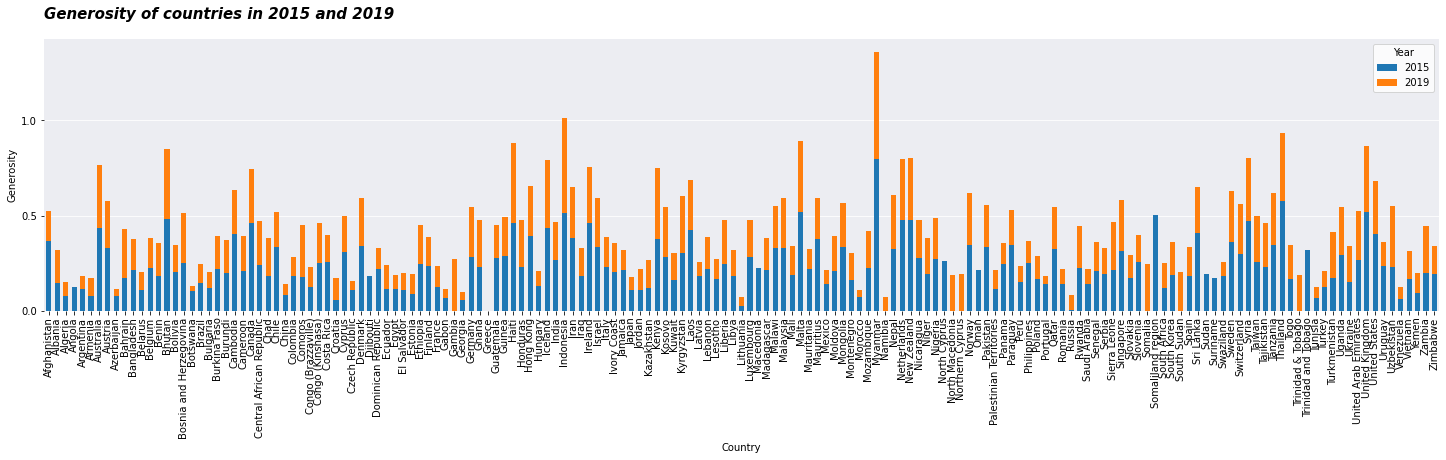

In [64]:
df.sort_values(by=["Generosity"], inplace=True, ascending=False)
group = df.groupby(["Country", "Year"])
groupGenerosity = group["Generosity"].aggregate(np.sum).unstack()
plotGenerosity = groupGenerosity.plot(kind = "bar", width=0.6,
                                      stacked=True,figsize=(25,5), fontsize=10).get_figure()
plt.locator_params(axis = "x", tight=True)
plt.locator_params(axis = "y",nbins=3)
ax = plotGenerosity.gca()
ax.set_facecolor("#ECEDF2")
ax.grid(axis='y', color = "white") 
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylabel("Generosity")
plt.title("Generosity of countries in 2015 and 2019", y=1.05, loc='left', fontsize=15, style='italic', fontweight='bold')
plotGenerosity.savefig("GenerosityOfCountries.png", bbox_inches='tight')


####8. Bubble chart of Freedom Vs Trust where the size of the bubble is the GDP per Capita for 2019 


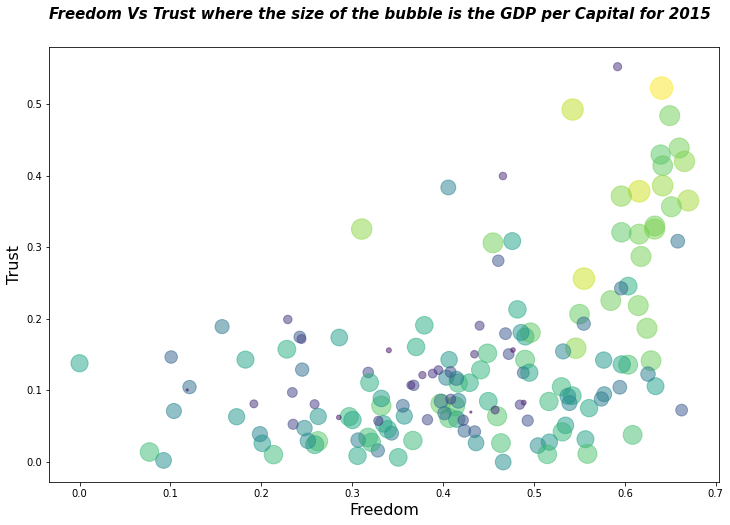

In [65]:
'''In 2019 there is no column showing "Trust". It is in 2015 so I made the bubble chart showing
data from 2015.'''
plt.figure(figsize=(12, 8))
plot=plt.scatter('Freedom', 'Trust (Government Corruption)',s=df_15['Economy (GDP per Capita)'].values*300, 
            alpha=0.5, data=df_15, c=df_15['Economy (GDP per Capita)'].values).get_figure()
plt.xlabel("Freedom", size=16)
plt.ylabel("Trust", size=16)
plt.title('Freedom Vs Trust where the size of the bubble is the GDP per Capital for 2015',
          y=1.05, loc='left', fontsize=15, style='italic', fontweight='bold')
plt.show()
plot.savefig("FreedomVsTrust.png", bbox_inches='tight')


####9. Bubble chart of Family Vs Health where the size is the happiness score of 2015 

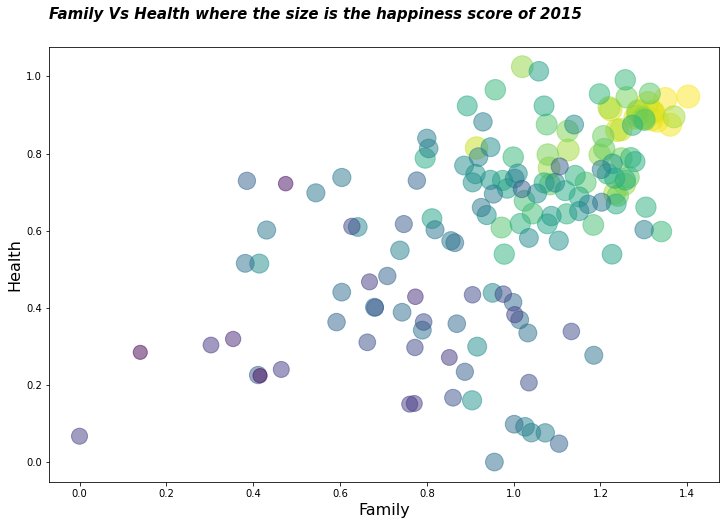

In [66]:
plt.figure(figsize=(12, 8))
plot=plt.scatter('Family', 'Health (Life Expectancy)',s=df_15['Happiness Score'].values*70, 
            alpha=0.5, data=df_15, c=df_15['Happiness Score'].values).get_figure()
plt.xlabel("Family", size=16)
plt.ylabel("Health", size=16)
plt.title('Family Vs Health where the size is the happiness score of 2015',
          y=1.05, loc='left', fontsize=15, style='italic', fontweight='bold')
plt.show()
plot.savefig("FamilyVsHealth.png", bbox_inches='tight')


####10. List the 3 variables that have the strongest correlation with the Happiness score (use Pearson Correlation) 

In [67]:
print(columns15)
print(columns19)

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']
['Overall rank', 'Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity', 'Perceptions of corruption', 'Year', 'Region']


In [69]:
from scipy.stats import pearsonr
corr_list = []
del columns15[0:4]
columns15.remove( 'Year')
for c in columns15:
    corr, _ = pearsonr(list(df_15['Happiness Score']), list(df_15[c]))
    corr_list.append([c,corr])
 
del columns19[0:3]
columns19.remove( 'Year')   
columns19.remove( 'Region')     
for c in columns19:
    corr, _ = pearsonr(list(df_19['Happiness Score']), list(df_19[c]))
    corr_list.append([c,corr])
    
i=1
for value1 in corr_list:
    for value2 in corr_list[i:]:
        if ((value1[0]==value2[0]) or (value1[0].lower() in value2[0].lower()) or (value2[0].lower() in value1[0].lower())):
            value1[1]=((value1[1] + value2[1])/2)
            corr_list.remove(value2)
    i+=1

def myFunc(e):
  return abs(e[1])
corr_list.sort(key=myFunc, reverse=True) 
print('\nThe first 3 variables that correlate with Happiness score:', end='\n')
k=0
for i in corr_list[0:3]:
    if k!=len(corr_list[0:3])-1:
        print('* ',i[0],end=',\n')
    else:
        print('* ',i[0],end=".")
    k+=1



The first 3 variables that correlate with Happiness score:
*  Economy (GDP per Capita),
*  Healthy life expectancy,
*  Social support.

# Thank you for looking at my code!
## Have a nice day :)
**Hanna Sarnecka**